In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a pandas DataFrame
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [4]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [5]:
# Get the number of total rides for each city type
total_rides_count=pyber_data_df.groupby(['type']).count()['ride_id']
total_rides_count

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [6]:
# Get the number of total drivers for each city type
total_drivers_count=city_data_df.groupby(['type']).sum()['driver_count']
total_drivers_count

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [7]:
# Get the number of total fare for each city type
total_fare_count=pyber_data_df.groupby(['type']).sum()['fare']
total_fare_count

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [8]:
# Get average fare per ride for each city type
average_fare_per_ride=total_fare_count/total_rides_count
average_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [9]:
# Get average fare per driver for each city type
average_fare_per_driver=total_fare_count/total_drivers_count
average_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [10]:
# Combine the data into a single dataset
summary_one_df=pd.merge((pd.merge(total_rides_count, total_drivers_count, how='left', on='type')),total_fare_count, how='left', on='type')
summary_one_df

,ride_id,driver_count,fare
type,,,
Rural,125,78,4327.93
Suburban,625,490,19356.33
Urban,1625,2405,39854.38


In [11]:
# Combine series into a dataframe
summary_two_df=pd.concat([average_fare_per_ride,average_fare_per_driver],axis=1)
summary_two_df

,0,1
type,,
Rural,34.623440,55.486282
Suburban,30.970128,39.502714
Urban,24.525772,16.571468


In [12]:
# Combine the data into a single dataset and delete the index name
final_summary_df=pd.merge(summary_one_df, summary_two_df, how='left', on='type')
final_summary_df.columns=['Total Rides','Total Drivers','Total Fares','Average Fare per Ride','Average Fare per Driver']
final_summary_df.index.name= None
final_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [13]:
# Format the columns
final_summary_df["Total Rides"]=final_summary_df["Total Rides"].map("{:,}".format)
final_summary_df["Total Drivers"]=final_summary_df["Total Drivers"].map("{:,}".format)
final_summary_df["Total Fares"]=final_summary_df["Total Fares"].map("${:,.2f}".format)
final_summary_df["Average Fare per Ride"]=final_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
final_summary_df["Average Fare per Driver"]=final_summary_df["Average Fare per Driver"].map("${:,.2f}".format)
final_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [14]:
pyber_data_df.columns=['City','Date','Fare','Ride Id','No. Drivers','City Type']
pyber_data_df.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [15]:
pyber_data_df=pyber_data_df.set_index('Date')
pyber_data_df.head()

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban


In [16]:
fare_by_type_df= pd.merge(pyber_data_df['City Type'],pyber_data_df['Fare'], how='left', on='Date',)
fare_by_type_df.head()

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58


In [17]:
fare_by_type_df.index=pd.to_datetime(fare_by_type_df.index)

In [18]:
fare_by_type_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [19]:
urban_cities_df=fare_by_type_df[fare_by_type_df['City Type'] == "Urban" ]

In [20]:
urban_fare_df=urban_cities_df.groupby(['Date']).sum()['Fare']
urban_fare_df.head()

Date
2019-01-01 00:08:16    37.91
2019-01-01 03:46:50     7.57
2019-01-01 05:23:21    10.75
2019-01-01 14:40:14     5.42
2019-01-01 14:42:25    12.31
Name: Fare, dtype: float64

In [21]:
suburban_cities_df=fare_by_type_df[fare_by_type_df['City Type'] == "Suburban" ]

In [22]:
suburban_fare_df=suburban_cities_df.groupby(['Date']).sum()['Fare']
suburban_fare_df.head()

Date
2019-01-01 00:46:46    47.74
2019-01-01 02:07:24    24.07
2019-01-01 12:32:48    25.56
2019-01-01 14:52:06    31.15
2019-01-02 00:13:08    44.71
Name: Fare, dtype: float64

In [23]:
rural_cities_df=fare_by_type_df[fare_by_type_df['City Type'] == "Rural" ]

In [24]:
rural_fare_df=rural_cities_df.groupby(['Date']).sum()['Fare']
rural_fare_df.head()

Date
2019-01-01 09:45:36    43.69
2019-01-02 11:18:32    52.12
2019-01-03 19:51:01    19.90
2019-01-04 03:31:26    24.88
2019-01-06 07:38:40    47.33
Name: Fare, dtype: float64

In [25]:
fare_by_date=pd.concat([rural_fare_df,suburban_fare_df,urban_fare_df], axis=1,sort=False)
fare_by_date.columns=['Rural','Suburban','Urban']
fare_by_date

,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [26]:
new_fare_by_date_df=fare_by_date.loc['2019-01-01':'2019-04-28']
new_fare_by_date_df

,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [27]:
weekly_fare_by_date= new_fare_by_date_df.resample('W').sum()
weekly_fare_by_date=weekly_fare_by_date.reset_index()
weekly_fare_by_date

,Date,Rural,Suburban,Urban
0,2019-01-06,187.92,721.60,1661.68
1,2019-01-13,67.65,1105.13,2050.43
2,2019-01-20,306.00,1218.20,1939.02
3,2019-01-27,179.69,1203.28,2129.51
4,2019-02-03,333.08,1042.79,2086.94
5,2019-02-10,115.80,974.34,2162.64
6,2019-02-17,95.82,1045.50,2235.07
7,2019-02-24,419.06,1412.74,2466.29
8,2019-03-03,175.14,858.46,2218.20
9,2019-03-10,303.94,925.27,2470.93


In [28]:
plt.style.use('fivethirtyeight')

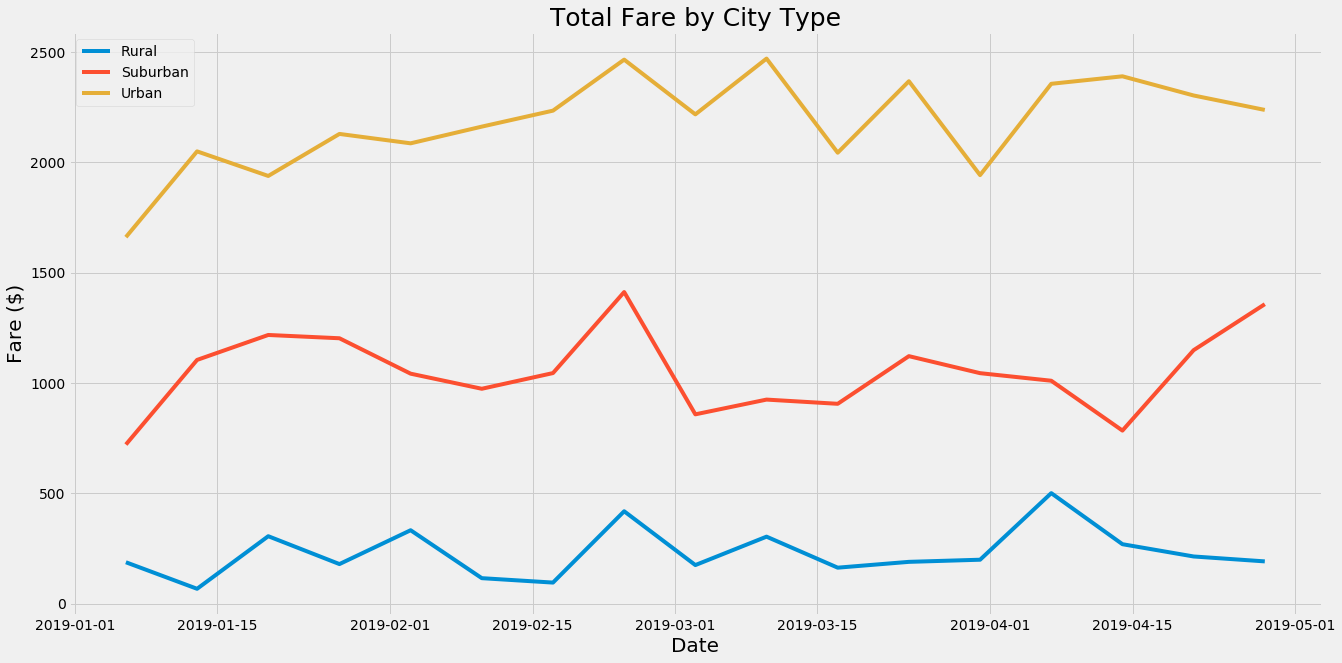

In [29]:
plt.figure(figsize=(20,10))

plt.plot(weekly_fare_by_date['Date'],weekly_fare_by_date['Rural'],label="Rural")
plt.plot(weekly_fare_by_date['Date'],weekly_fare_by_date['Suburban'],label="Suburban")
plt.plot(weekly_fare_by_date['Date'],weekly_fare_by_date['Urban'],label="Urban")


plt.title("Total Fare by City Type",fontsize=25)
plt.ylabel("Fare ($)",fontsize=20)
plt.xlabel("Date",fontsize=20)

plt.legend()

plt.savefig("Charts/Challenge.png")
plt.show()